<a href="https://colab.research.google.com/github/jcmachicao/intro_ia_maestrias_espana/blob/main/intro_IA___02_grafos_textos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Caso de construcción de base de conocimiento simple

In [ ]:
#@title definicion del JSON de textos
textos_proyecto = {
  "reuniones": [
    {
      "id": "reunion_01",
      "fecha": "2025-03-10",
      "texto": "Durante la reunión semanal, el equipo de backend comentó que está teniendo problemas con la integración del nuevo módulo de autenticación. Juan explicó que el servicio de identidad no responde correctamente en el entorno de pruebas y que esto está bloqueando varias tareas. Desde frontend, Marta mencionó que su equipo no puede avanzar porque depende de esos endpoints. Producto pidió una estimación de impacto, pero backend aclaró que necesita apoyo de infraestructura para diagnosticar el problema."
    },
    {
      "id": "reunion_02",
      "fecha": "2025-03-12",
      "texto": "En la reunión de seguimiento del proyecto, el responsable de infraestructura señaló que los retrasos no están relacionados con los servidores, sino con cambios frecuentes en los requisitos. El equipo de QA indicó que ha detectado errores recurrentes en el componente de pagos. Laura, desde producto, reconoció que hubo cambios de alcance, pero afirmó que eran necesarios por pedidos del cliente. Se acordó revisar el flujo de aprobación de cambios."
    },
    {
      "id": "reunion_03",
      "fecha": "2025-03-15",
      "texto": "La reunión de coordinación comenzó con una queja del equipo de soporte, que está recibiendo múltiples incidencias de usuarios finales. Según soporte, la mayoría de los problemas están relacionados con el módulo de reportes. Desarrollo indicó que ese módulo fue entregado según lo especificado, pero QA recordó que aún había pruebas pendientes. La discusión terminó con una solicitud a producto para clarificar prioridades."
    }
  ],
  "correos": [
    {
      "id": "correo_01",
      "remitente": "juan.backend@empresa.com",
      "destinatario": "infraestructura@empresa.com",
      "texto": "Hola equipo, seguimos teniendo fallos intermitentes en el servicio de autenticación. Desde backend no logramos identificar si el problema viene de la configuración del entorno o del balanceador. Esto está afectando directamente al avance del sprint."
    },
    {
      "id": "correo_02",
      "remitente": "marta.frontend@empresa.com",
      "destinatario": "producto@empresa.com",
      "texto": "Buenos días, el equipo de frontend está bloqueado porque aún no tenemos una versión estable de los endpoints de login. Necesitamos saber si el alcance del módulo de autenticación va a cambiar nuevamente."
    },
    {
      "id": "correo_03",
      "remitente": "laura.producto@empresa.com",
      "destinatario": "equipo-proyecto@empresa.com",
      "texto": "Hola a todos, el cliente ha solicitado algunos ajustes en el flujo de pagos. Somos conscientes de que esto puede generar impacto, pero creemos que es clave para cumplir con los objetivos del proyecto."
    },
    {
      "id": "correo_04",
      "remitente": "qa@empresa.com",
      "destinatario": "desarrollo@empresa.com",
      "texto": "Durante las pruebas del último build detectamos errores críticos en el componente de pagos y en el módulo de reportes. Estos problemas ya habían sido mencionados en el reporte anterior y siguen sin resolverse."
    },
    {
      "id": "correo_05",
      "remitente": "soporte@empresa.com",
      "destinatario": "producto@empresa.com",
      "texto": "Estamos recibiendo un volumen creciente de tickets relacionados con reportes incorrectos. Los usuarios indican que los datos no coinciden con lo esperado y esto está generando quejas formales."
    }
  ],
  "reportes_estado": [
    {
      "id": "reporte_01",
      "componente": "Modulo de Autenticacion",
      "texto": "El módulo de autenticación presenta inestabilidad en el entorno de pruebas. Backend ha reportado fallos en la comunicación con el servicio de identidad. Infraestructura está analizando la configuración actual, pero aún no se ha identificado una causa raíz."
    },
    {
      "id": "reporte_02",
      "componente": "Modulo de Pagos",
      "texto": "El componente de pagos se encuentra parcialmente operativo. QA ha identificado errores críticos que afectan ciertos escenarios. Producto ha solicitado cambios adicionales, lo que podría retrasar la corrección definitiva."
    }
  ]
}


In [ ]:
list(textos_proyecto)

['reuniones', 'correos', 'reportes_estado']

In [ ]:
textos_proyecto['reuniones']

[{'id': 'reunion_01',
  'fecha': '2025-03-10',
  'texto': 'Durante la reunión semanal, el equipo de backend comentó que está teniendo problemas con la integración del nuevo módulo de autenticación. Juan explicó que el servicio de identidad no responde correctamente en el entorno de pruebas y que esto está bloqueando varias tareas. Desde frontend, Marta mencionó que su equipo no puede avanzar porque depende de esos endpoints. Producto pidió una estimación de impacto, pero backend aclaró que necesita apoyo de infraestructura para diagnosticar el problema.'},
 {'id': 'reunion_02',
  'fecha': '2025-03-12',
  'texto': 'En la reunión de seguimiento del proyecto, el responsable de infraestructura señaló que los retrasos no están relacionados con los servidores, sino con cambios frecuentes en los requisitos. El equipo de QA indicó que ha detectado errores recurrentes en el componente de pagos. Laura, desde producto, reconoció que hubo cambios de alcance, pero afirmó que eran necesarios por ped

* Hay actores explícitos (personas, equipos, áreas).

* Hay componentes claros (autenticación, pagos, reportes).

* Los problemas se repiten desde distintas perspectivas.

Las relaciones no siempre usan el mismo verbo (“bloquea”, “depende”, “afecta”, “solicita”), lo que obliga a pensar.

In [ ]:
# !pip install spacy
!python -m spacy download es_core_news_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 81.5 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
import spacy

nlp = spacy.load("es_core_news_sm")

texto = """
Durante la reunión semanal, el equipo de backend comentó que está teniendo problemas
con la integración del nuevo módulo de autenticación. Juan explicó que el servicio
de identidad no responde correctamente.
"""

doc = nlp(texto)

actores = set()

# 1. Entidades nombradas
for ent in doc.ents:
    if ent.label_ in ["PER", "ORG"]:
        actores.add(ent.text)

# 2. Patrones simples: "equipo de X"
for token in doc:
    if token.text.lower() == "equipo" and token.nbor(1).text.lower() == "de":
        actores.add("equipo de " + token.nbor(2).text)

print(actores)

{'Juan', 'equipo de backend'}


Comparar:

* spaCy → preciso pero limitado
* LLM → flexible pero menos controlable

In [ ]:
import spacy

nlp = spacy.load("es_core_news_sm")

texto = """
Durante la reunión semanal, el equipo de backend comentó que está teniendo problemas
con la integración del nuevo módulo de autenticación. Juan explicó que el servicio
de identidad no responde correctamente y que esto está bloqueando varias tareas.
Desde frontend, Marta mencionó que su equipo no puede avanzar porque depende de esos endpoints.
Producto pidió una estimación de impacto, pero backend aclaró que necesita apoyo de infraestructura
para diagnosticar el problema.
"""

doc = nlp(texto)

relaciones = []

for token in doc:
    # Nos quedamos solo con verbos principales
    if token.pos_ == "VERB":
        sujeto = None
        objeto = None

        # Buscar sujeto
        for child in token.children:
            if child.dep_ in ("nsubj", "nsubj:pass"):
                sujeto = child.text

        # Buscar objeto o complemento
        for child in token.children:
            if child.dep_ in ("obj", "obl"):
                objeto = child.text

        if sujeto and objeto:
            relaciones.append((sujeto, token.lemma_, objeto))

for r in relaciones:
    print(r)

('equipo', 'comentar', 'reunión')
('esto', 'bloquear', 'tareas')
('Marta', 'mencionar', 'frontend')
('Producto', 'pedir', 'estimación')


In [ ]:
relaciones = [
    ("equipo de backend", "comentar", "problemas"),
    ("Juan", "explicar", "servicio de identidad"),
    ("frontend", "depender", "endpoints"),
    ("Producto", "pedir", "estimación"),
    ("backend", "necesitar", "infraestructura")
]

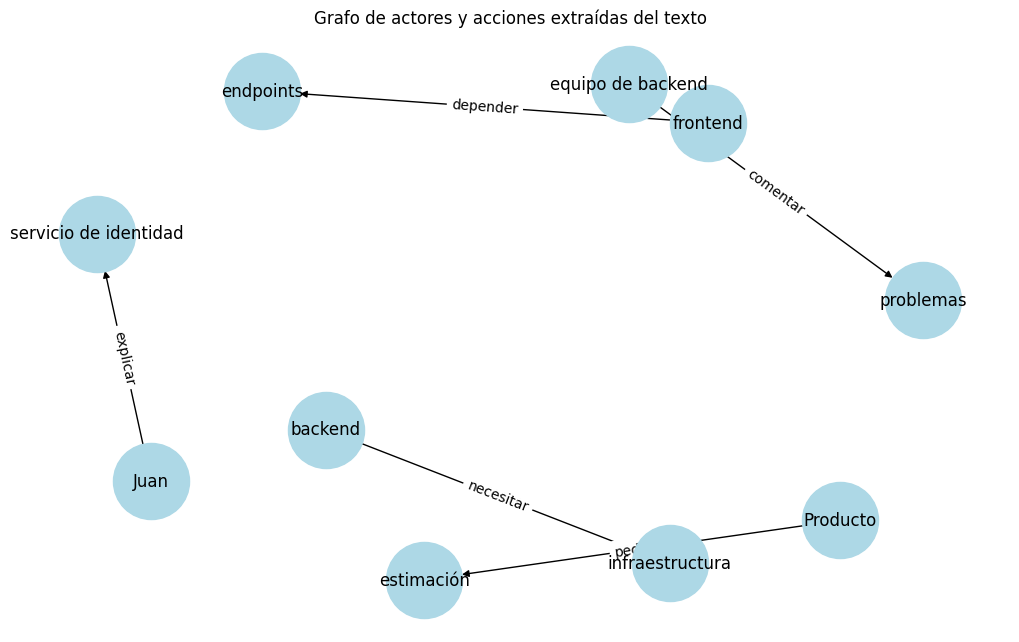

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph()

for sujeto, verbo, objeto in relaciones:
    G.add_edge(sujeto, objeto, label=verbo)

plt.figure(figsize=(10, 6))
pos = nx.spring_layout(G, k=1.5, seed=42)

nx.draw(
    G,
    pos,
    with_labels=True,
    node_size=3000,
    node_color="lightblue",
    arrows=True
)

edge_labels = nx.get_edge_attributes(G, "label")
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.title("Grafo de actores y acciones extraídas del texto")
plt.show()
